In [1]:
import os
import pandas as pd
from utils import save_dataframe_as_latex

#database = 'a5a'
#database = 'abalone'
#database = 'CPU_SMALL'
database = 'Diabetes'
#database = 'w3a'

#database = 'eunite2001'

path = '/Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/medidas-para-tfm/'
directory = path + f'results/{database}/accuracy_time_stats'  # Replace this with the path to your directory
verbose_path = path + f'results/{database}/verboses'
analysis_files = path + f'analysis/{database}'
plot_path = f'{analysis_files}/plot/'
tables_path = f'{analysis_files}/latex-tables/'

## columns names 
percent_column = 'percent'
n_components_column = 'n_components' 
score_column = 'Mean Score in test'		
time_column = 'Mean Training Time'
damping_column = 'accuracy per unit time in percent'


# Get a list of all files in the directory
files = [file for file in os.listdir(directory) if os.path.isfile(os.path.join(directory, file))]

# Now 'files' contains a list of the names of all files in the directory
print(files)

# Separate files with "classification" in their name
ridge_files = [file for file in files if "ridge" in file]
ridge_files.sort()

# Separate other files
svm_files = [file for file in files if file not in ridge_files]
svm_files.sort()
damping_formula = lambda accuracy, time : accuracy / time *100

score_column, time_column = ('Mean Score in test', 'Mean Training Time')

def damping_df(df):
    df[damping_column] = damping_formula(df[score_column],df[time_column])
    return df

 
# Create a DataFrame for ridge files
ridge_data = pd.DataFrame()
ridge_list = []
ridge_list_names = []
ridge_data_verbose = pd.DataFrame()
for file in ridge_files:
    # mean
    file_path = os.path.join(directory, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed
    #data[percent_column] = data.apply(compute_percent, axis=1)

    data = damping_df(data)
    ridge_list_names.append(file)
    data = data.sort_values(by=n_components_column)
    data['File'] = file  # Add a column to identify the file 
    ridge_data = pd.concat([ridge_data, data], ignore_index=True)
    ridge_list.append(data)

    # verbose
    file_path = os.path.join(verbose_path, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed
    data = data.sort_values(by=n_components_column)
    data['File'] = file  # Add a column to identify the file
    ridge_data_verbose = pd.concat([ridge_data_verbose, data], ignore_index=True) 


svm_data = pd.DataFrame()
svm_data_verbose = pd.DataFrame()
svm_list = []
svm_list_names = []
for file in svm_files:
    file_path = os.path.join(directory, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed
    #data[percent_column] = data.apply(compute_percent, axis=1)
    #data = data.sort_values(by=n_components_column)
    data = damping_df(data)
    data['File'] = file  # Add a column to identify the file
    data = data.sort_values(by=n_components_column)
    svm_data = pd.concat([svm_data, data], ignore_index=True)
    svm_list.append(data)
    svm_list_names.append(file)
    # verbose
    file_path = os.path.join(verbose_path, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed
    #data[percent_column] = data.apply(compute_percent, axis=1)
    #data = data.sort_values(by=n_components_column)
    data['File'] = file  # Add a column to identify the file
    svm_data_verbose = pd.concat([svm_data_verbose, data], ignore_index=True)

print('Ridge files')
print(svm_list_names)
print('SvM files')
print(svm_list_names)
svm_data

std_column = 'Std Score in test'
if (ridge_list[0][std_column] == 0).all():
    std_column = 'cv_std_test_score'

print(std_column)
svm_data

['Random_Fourier_features_and_SVC_Diabetes_cv_5.csv', 'Kernel_SVM_Diabetes_cv_5.csv', 'Kernel_ridge_classification_Diabetes_cv_5.csv', 'Random_Fourier_features_and_ridge_classification_Diabetes_cv_5.csv', 'Nystrom_and_ridge_classification_Diabetes_cv_5.csv', 'Nystrom_and_SVC_Diabetes_cv_5.csv']
Ridge files
['Kernel_SVM_Diabetes_cv_5.csv', 'Nystrom_and_SVC_Diabetes_cv_5.csv', 'Random_Fourier_features_and_SVC_Diabetes_cv_5.csv']
SvM files
['Kernel_SVM_Diabetes_cv_5.csv', 'Nystrom_and_SVC_Diabetes_cv_5.csv', 'Random_Fourier_features_and_SVC_Diabetes_cv_5.csv']
Std Score in test


,percent,n_components,Mean Score in test,Std Score in test,Mean Training Time,Std Training Time,Mean Best Score in CV,Std Best Score in CV,cv_mean_test_score,cv_std_test_score,cv_mean_fit_time,cv_std_fit_time,accuracy per unit time in percent,File
0,100,768,0.774740,0.039900,0.003786,0.000271,0.776882,0.016686,0.776882,0.036194,0.002606,0.000073,20463.448681,Kernel_SVM_Diabetes_cv_5.csv
1,1,7,0.777344,0.046201,0.001157,0.000095,0.766507,0.008934,0.766507,0.031830,0.000866,0.000074,67183.515351,Nystrom_and_SVC_Diabetes_cv_5.csv
2,2,15,0.765625,0.033954,0.001360,0.000113,0.774280,0.010211,0.774280,0.031853,0.001098,0.000073,56298.457223,Nystrom_and_SVC_Diabetes_cv_5.csv
3,3,23,0.772135,0.041565,0.002149,0.000236,0.778216,0.016585,0.778216,0.037480,0.001621,0.000264,35938.197488,Nystrom_and_SVC_Diabetes_cv_5.csv
4,4,30,0.764323,0.035967,0.001877,0.000247,0.776473,0.016812,0.776473,0.035365,0.001421,0.000093,40715.068000,Nystrom_and_SVC_Diabetes_cv_5.csv
5,5,38,0.770833,0.032317,0.002577,0.000303,0.777335,0.018149,0.777335,0.038920,0.001726,0.000104,29907.121163,Nystrom_and_SVC_Diabetes_cv_5.csv
6,6,46,0.768229,0.036920,0.003379,0.001168,0.777331,0.018149,0.777331,0.035050,0.002225,0.000130,22735.084346,Nystrom_and_SVC_Diabetes_cv_5.csv
7,7,53,0.763021,0.043028,0.003242,0.000245,0.778208,0.019507,0.778208,0.035128,0.002416,0.000140,23534.517287,Nystrom_and_SVC_Diabetes_cv_5.csv
8,8,61,0.769531,0.036342,0.003706,0.000389,0.777331,0.018144,0.777331,0.037606,0.002917,0.000663,20762.921150,Nystrom_and_SVC_Diabetes_cv_5.csv
9,9,69,0.773438,0.042072,0.004833,0.000494,0.777335,0.017003,0.777335,0.041840,0.003524,0.000235,16002.525651,Nystrom_and_SVC_Diabetes_cv_5.csv


In [2]:
def show_dataframe(dataframe, column, ascending = True, decimals = 3, only_relevant_columns = True, n_rows = None):
      pd.reset_option('display.max_colwidth')
      pd.set_option('display.max_rows', n_rows)
      dataframe =  pd.DataFrame(dataframe).round(decimals).sort_values(by=column, ascending= ascending)

      if only_relevant_columns:
            dataframe = dataframe[["File","percent", column, "n_components" ]]
   
      return dataframe

score_column = ridge_data.columns[2]
time_column = ridge_data.columns[4]
name_column = 'File'

def show_verbose(dataframe, column = n_components_column, ascending = False, decimals = 3, n_rows = None):
      pd.set_option('display.max_colwidth', None)
      pd.set_option('display.max_rows', n_rows)
      dataframe =  pd.DataFrame(dataframe).round(decimals).sort_values(by=column, ascending= ascending)
      return dataframe[["Best Parameters","File","percent", "n_components" ]]


In [3]:
# get tables 
columns = [score_column, time_column, damping_column ]
for column in columns:
    column_name = column.replace(' ', '_').replace('_', '-')
    df = show_dataframe(ridge_data, column, ascending=False)
    save_dataframe_as_latex(df, tables_path, f'Ridge-{column_name}-result')
    df = show_dataframe(svm_data, column, ascending=False)
    save_dataframe_as_latex(df, tables_path, f'SVM-{column_name}-result')

DataFrame saved as LaTeX table to /Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/medidas-para-tfm/analysis/Diabetes/latex-tables/Ridge-Mean-Score-in-test-result.tex
DataFrame saved as LaTeX table to /Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/medidas-para-tfm/analysis/Diabetes/latex-tables/SVM-Mean-Score-in-test-result.tex
DataFrame saved as LaTeX table to /Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/medidas-para-tfm/analysis/Diabetes/latex-tables/Ridge-Mean-Training-Time-result.tex
DataFrame saved as LaTeX table to /Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/medidas-para-tfm/analysis/Diabetes/latex-tables/SVM-Mean-Training-Time-result.tex
DataFrame saved as LaTeX table to /Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/medidas-para-tfm/analysis/Diabetes/latex-tables/Ridge-accuracy-per-unit-time-in-percent-result.tex
DataFrame saved as LaTeX table to /Users/bla

# Sort by score 

In [4]:

show_dataframe(svm_data, score_column, ascending=False)

,File,percent,Mean Score in test,n_components
25,Random_Fourier_features_and_SVC_Diabetes_cv_5.csv,5,0.779,38
30,Random_Fourier_features_and_SVC_Diabetes_cv_5.csv,10,0.777,76
1,Nystrom_and_SVC_Diabetes_cv_5.csv,1,0.777,7
0,Kernel_SVM_Diabetes_cv_5.csv,100,0.775,768
16,Nystrom_and_SVC_Diabetes_cv_5.csv,16,0.775,122
40,Random_Fourier_features_and_SVC_Diabetes_cv_5.csv,20,0.775,153
20,Nystrom_and_SVC_Diabetes_cv_5.csv,20,0.773,153
9,Nystrom_and_SVC_Diabetes_cv_5.csv,9,0.773,69
14,Nystrom_and_SVC_Diabetes_cv_5.csv,14,0.773,107
39,Random_Fourier_features_and_SVC_Diabetes_cv_5.csv,19,0.773,145


# Damping

In [5]:
show_dataframe(ridge_data, damping_column, ascending=False)

,File,percent,accuracy per unit time in percent,n_components
22,Random_Fourier_features_and_ridge_classificati...,2,69171.527,15
21,Random_Fourier_features_and_ridge_classificati...,1,68711.827,7
1,Nystrom_and_ridge_classification_Diabetes_cv_5...,1,61598.332,7
24,Random_Fourier_features_and_ridge_classificati...,4,61152.059,30
23,Random_Fourier_features_and_ridge_classificati...,3,60112.557,23
25,Random_Fourier_features_and_ridge_classificati...,5,59036.051,38
2,Nystrom_and_ridge_classification_Diabetes_cv_5...,2,55301.064,15
27,Random_Fourier_features_and_ridge_classificati...,7,52828.584,53
26,Random_Fourier_features_and_ridge_classificati...,6,52746.706,46
4,Nystrom_and_ridge_classification_Diabetes_cv_5...,4,46773.034,30


# Plotting 
## Ridge

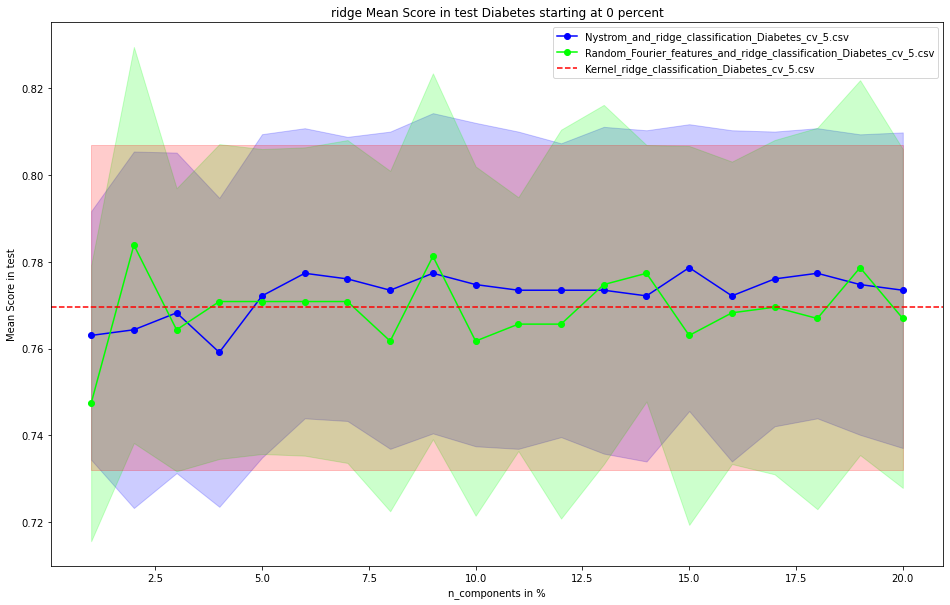

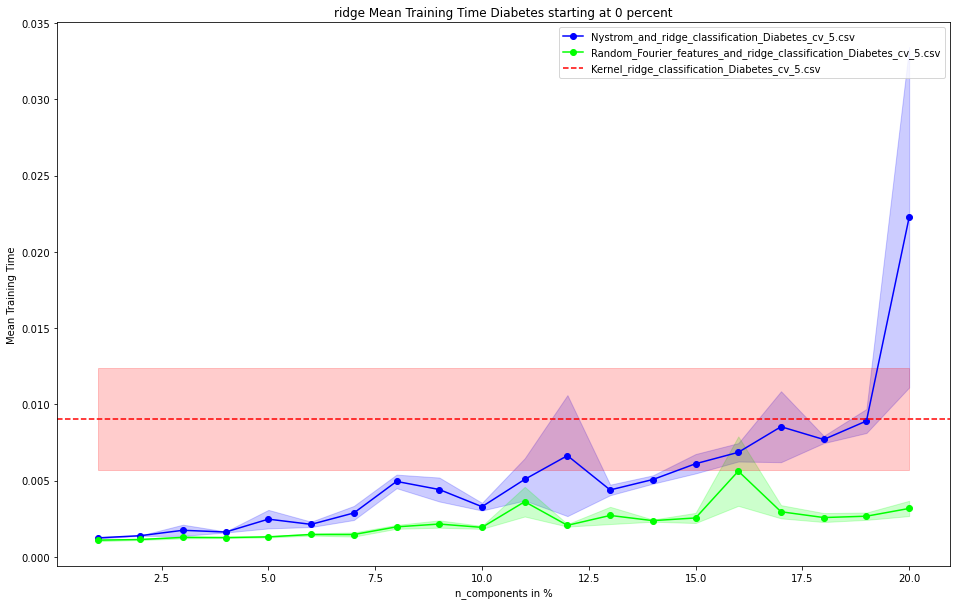

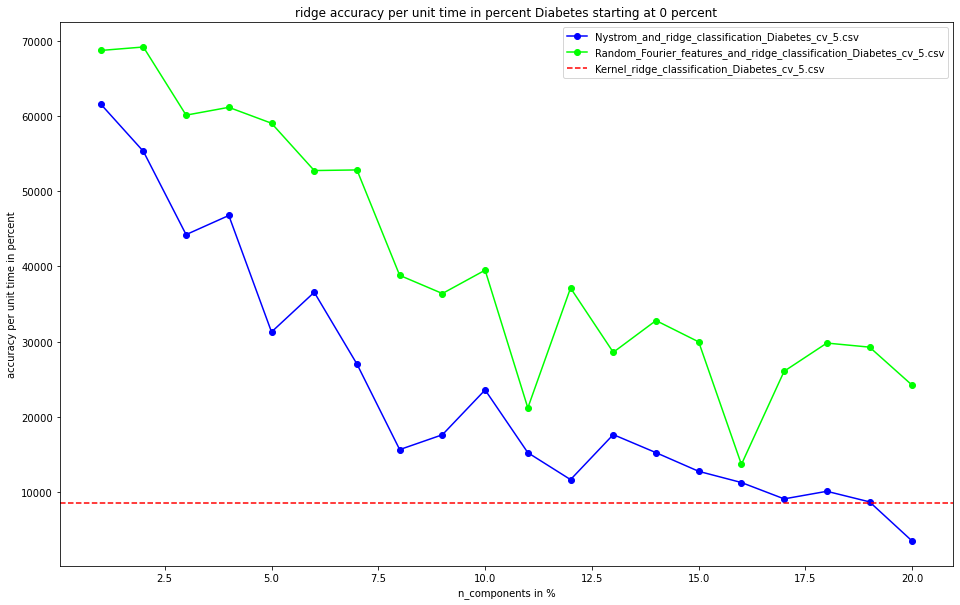

In [6]:
from plotting import view_plots_and_save_them

names_of_std_for_column = {score_column:'Std Score in test', 
    time_column:'Std Training Time',
    damping_column:False
}
if (ridge_list[0][names_of_std_for_column[score_column]] == 0).all():
    names_of_std_for_column = {score_column:'cv_std_test_score', 
        time_column:'cv_std_fit_time',
        damping_column:False
    }
    
columns = [score_column, time_column, damping_column ]

view_plots_and_save_them(df_list = ridge_list, df_list_names=ridge_list_names,
            names_of_std_for_column=names_of_std_for_column, type ='ridge',
            columns=columns, database=database, plot_path = plot_path,
            percent_of_n_components_bigger_than = 0, marker='o')


## SVM 

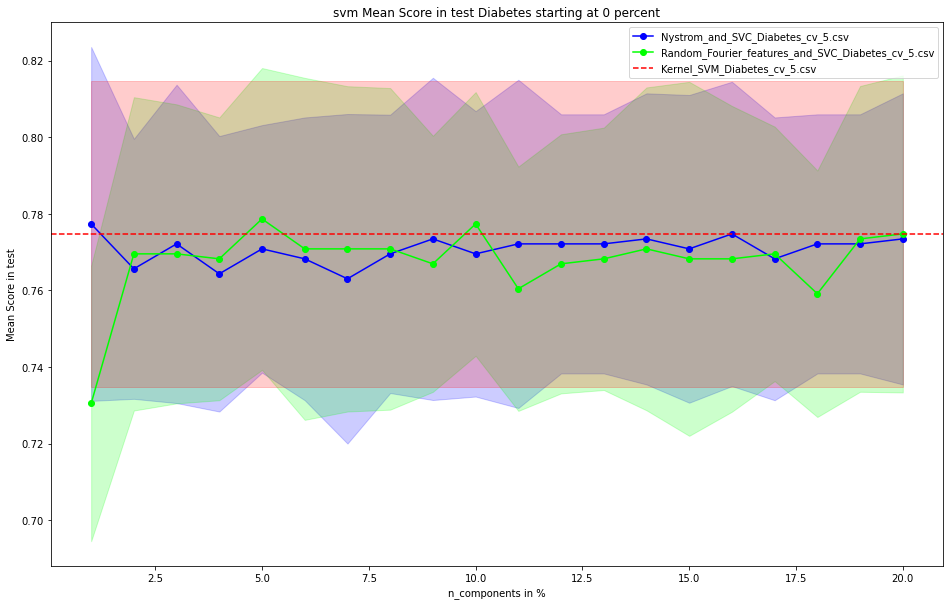

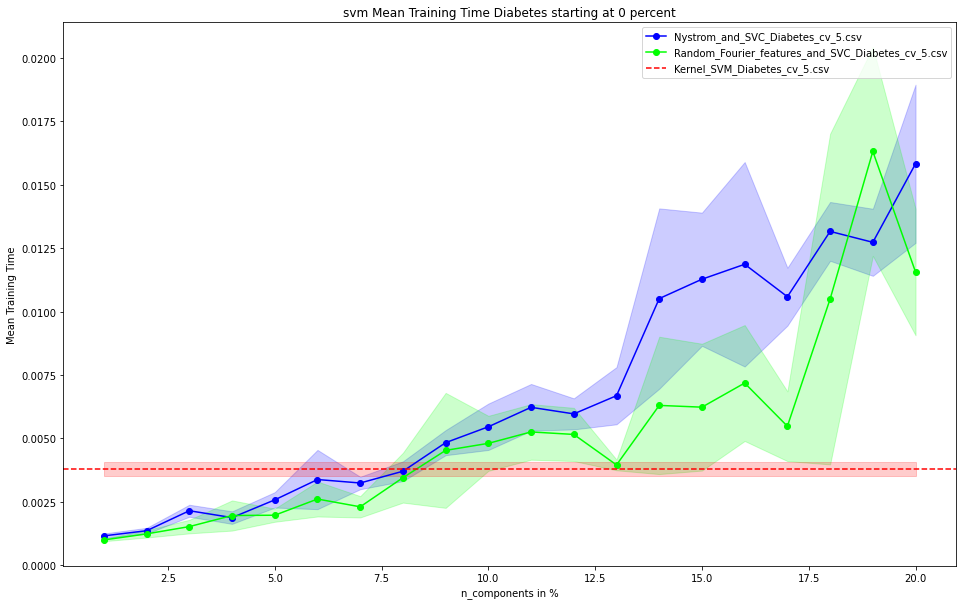

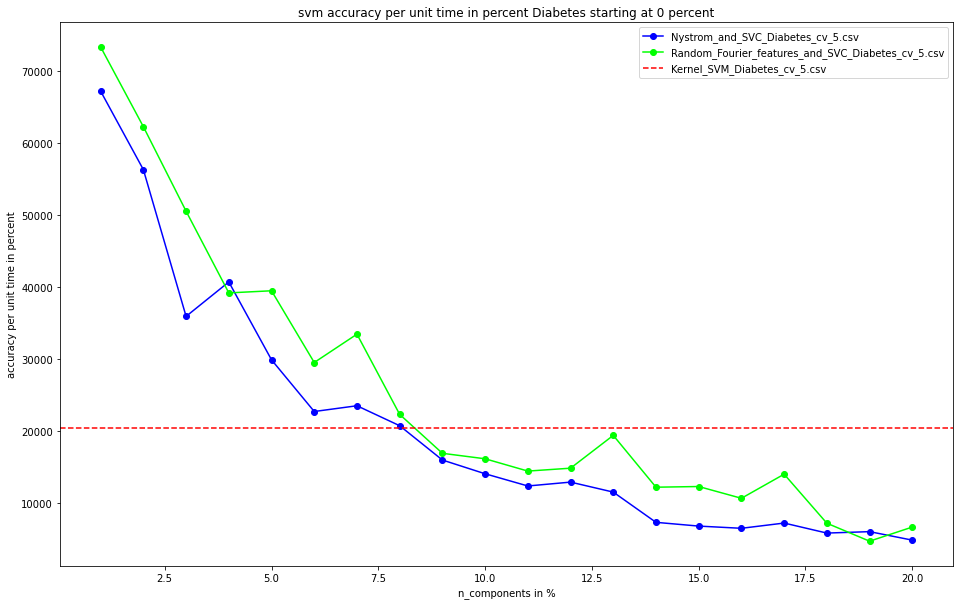

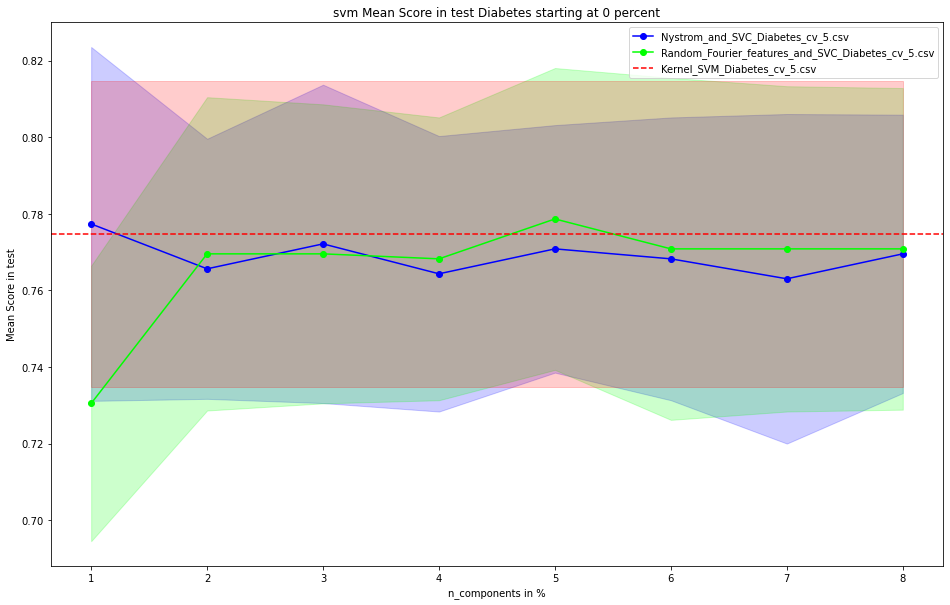

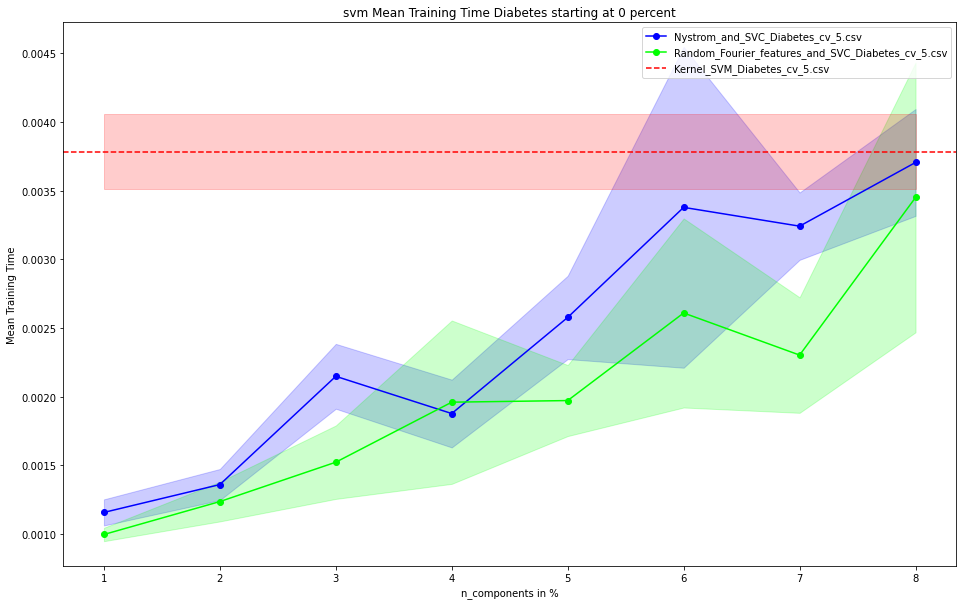

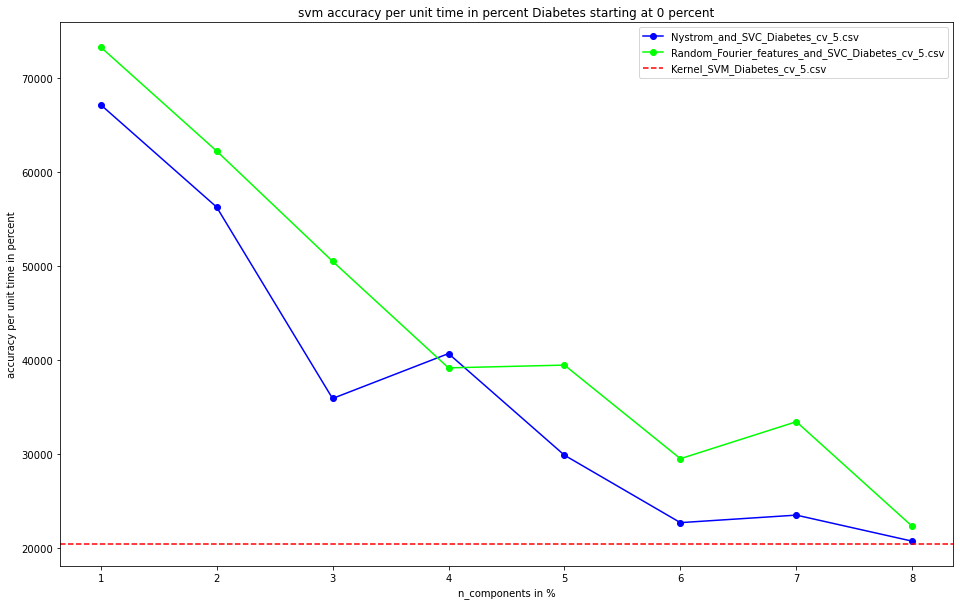

In [11]:
view_plots_and_save_them(df_list = svm_list, df_list_names=svm_list_names,
            names_of_std_for_column=names_of_std_for_column, type ='svm',
            columns=columns, database=database, plot_path = plot_path,
            percent_of_n_components_bigger_than = 0, marker='o')
view_plots_and_save_them(df_list = svm_list, df_list_names=svm_list_names,
            names_of_std_for_column=names_of_std_for_column, type ='svm',
            columns=columns, database=database, plot_path = plot_path,
            percent_of_n_components_bigger_than = 0,
            percent_of_n_components_smaller_than=8, marker='o')

# Hyperparameter

In [8]:
def unique_values(df):
    pd.set_option('display.max_colwidth', None)
    return df.groupby(['Best Parameters', 'File']).size().reset_index(name='Frequency')

df = unique_values(svm_data_verbose)
save_dataframe_as_latex(df, tables_path, 'svm-best-hyperparameters')
df

DataFrame saved as LaTeX table to /Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/medidas-para-tfm/analysis/Diabetes/latex-tables/svm-best-hyperparameters.tex


,Best Parameters,File,Frequency
0,"{'fourier_random_features__gamma': 0.0001220703125, 'svm__C': 100.0}",Random_Fourier_features_and_SVC_Diabetes_cv_5.csv,16
1,"{'fourier_random_features__gamma': 0.0008501470344688711, 'svm__C': 100.0}",Random_Fourier_features_and_SVC_Diabetes_cv_5.csv,16
2,"{'fourier_random_features__gamma': 0.0008501470344688711, 'svm__C': 6.30957344480193}",Random_Fourier_features_and_SVC_Diabetes_cv_5.csv,6
3,"{'fourier_random_features__gamma': 0.005920767837931241, 'svm__C': 0.3981071705534969}",Random_Fourier_features_and_SVC_Diabetes_cv_5.csv,4
4,"{'fourier_random_features__gamma': 0.005920767837931241, 'svm__C': 100.0}",Random_Fourier_features_and_SVC_Diabetes_cv_5.csv,13
5,"{'fourier_random_features__gamma': 0.005920767837931241, 'svm__C': 6.30957344480193}",Random_Fourier_features_and_SVC_Diabetes_cv_5.csv,17
6,"{'fourier_random_features__gamma': 0.0412346222116529, 'svm__C': 0.3981071705534969}",Random_Fourier_features_and_SVC_Diabetes_cv_5.csv,8
7,"{'kernel_svm__C': 1.0, 'kernel_svm__gamma': 0.015625}",Kernel_SVM_Diabetes_cv_5.csv,1
8,"{'kernel_svm__C': 10.0, 'kernel_svm__gamma': 0.0013810679320049757}",Kernel_SVM_Diabetes_cv_5.csv,2
9,"{'kernel_svm__C': 1000.0, 'kernel_svm__gamma': 0.0001220703125}",Kernel_SVM_Diabetes_cv_5.csv,1


In [9]:
df = unique_values(ridge_data_verbose)
save_dataframe_as_latex(df, tables_path, 'ridge-best-hyperparameters')
df

DataFrame saved as LaTeX table to /Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/medidas-para-tfm/analysis/Diabetes/latex-tables/ridge-best-hyperparameters.tex


,Best Parameters,File,Frequency
0,"{'fourier_random_features__gamma': 0.0001220703125, 'ridge_classification__alpha': 0.0001}",Random_Fourier_features_and_ridge_classification_Diabetes_cv_5.csv,13
1,"{'fourier_random_features__gamma': 0.0001220703125, 'ridge_classification__alpha': 0.0031622776601683794}",Random_Fourier_features_and_ridge_classification_Diabetes_cv_5.csv,8
2,"{'fourier_random_features__gamma': 0.0013810679320049757, 'ridge_classification__alpha': 0.0001}",Random_Fourier_features_and_ridge_classification_Diabetes_cv_5.csv,9
3,"{'fourier_random_features__gamma': 0.0013810679320049757, 'ridge_classification__alpha': 0.0031622776601683794}",Random_Fourier_features_and_ridge_classification_Diabetes_cv_5.csv,14
4,"{'fourier_random_features__gamma': 0.0013810679320049757, 'ridge_classification__alpha': 0.1}",Random_Fourier_features_and_ridge_classification_Diabetes_cv_5.csv,4
5,"{'fourier_random_features__gamma': 0.015625, 'ridge_classification__alpha': 0.0001}",Random_Fourier_features_and_ridge_classification_Diabetes_cv_5.csv,2
6,"{'fourier_random_features__gamma': 0.015625, 'ridge_classification__alpha': 0.0031622776601683794}",Random_Fourier_features_and_ridge_classification_Diabetes_cv_5.csv,5
7,"{'fourier_random_features__gamma': 0.015625, 'ridge_classification__alpha': 0.1}",Random_Fourier_features_and_ridge_classification_Diabetes_cv_5.csv,15
8,"{'fourier_random_features__gamma': 0.015625, 'ridge_classification__alpha': 3.1622776601683795}",Random_Fourier_features_and_ridge_classification_Diabetes_cv_5.csv,10
9,"{'kernel_ridge_classification__alpha': 0.0001, 'kernel_ridge_classification__gamma': 0.0001220703125}",Kernel_ridge_classification_Diabetes_cv_5.csv,1
